In [137]:
#Importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from scipy.stats import norm , lognorm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import scipy as scipy
%matplotlib inline

In [138]:
#load the training data
df_train = pd.read_csv('train.csv')

In [139]:
#describe the data
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [140]:
#shape of the training data
df_train.shape

(1460, 81)

In [141]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [142]:
#total columns in the training set
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [143]:
#let's get description about the salesprices
df_train['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/daywalker/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


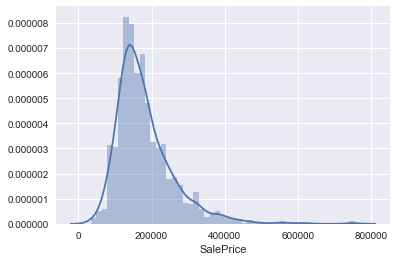

In [144]:
#histogram for the sale price
sns.distplot(df_train['SalePrice'])

In [145]:
#plot the skewness and kurtosis
print("skewness: %f" % df_train['SalePrice'].skew())
print('kurtosis: %f'  % df_train['SalePrice'].kurt())

skewness: 1.882876
kurtosis: 6.536282


In [146]:
#scatter plot for the GrLivArea and SalesPrice
var ='GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

In [147]:
data.head(2)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262


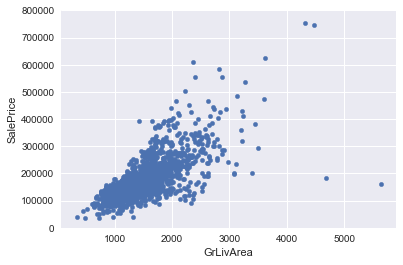

In [148]:
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

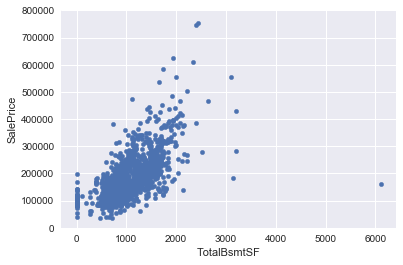

In [149]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

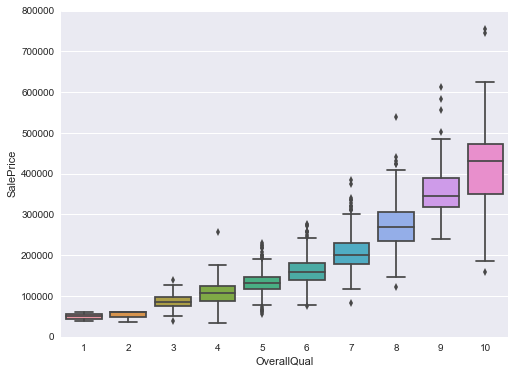

In [150]:
#box plot overallqual/SalePrice
var='OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x =var, y='SalePrice', data =data)
fig.axis(ymin=0, ymax=800000);

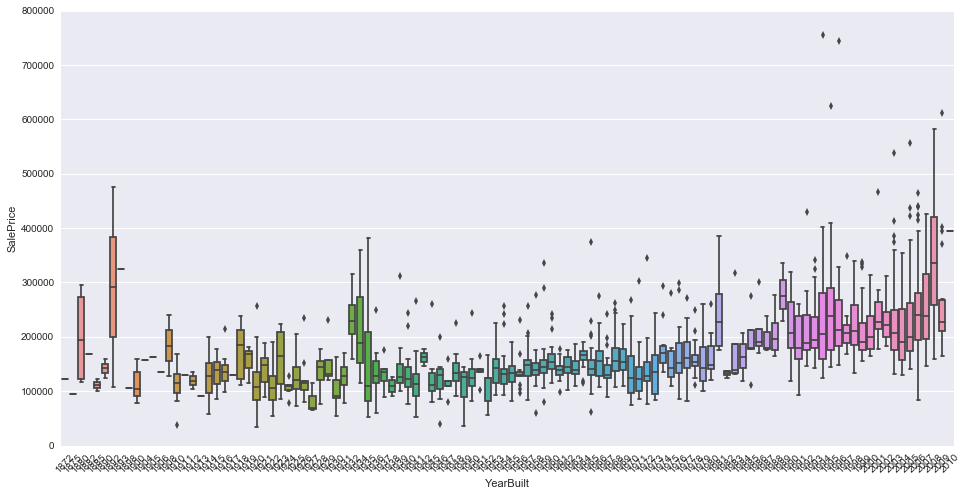

In [151]:
var ='YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

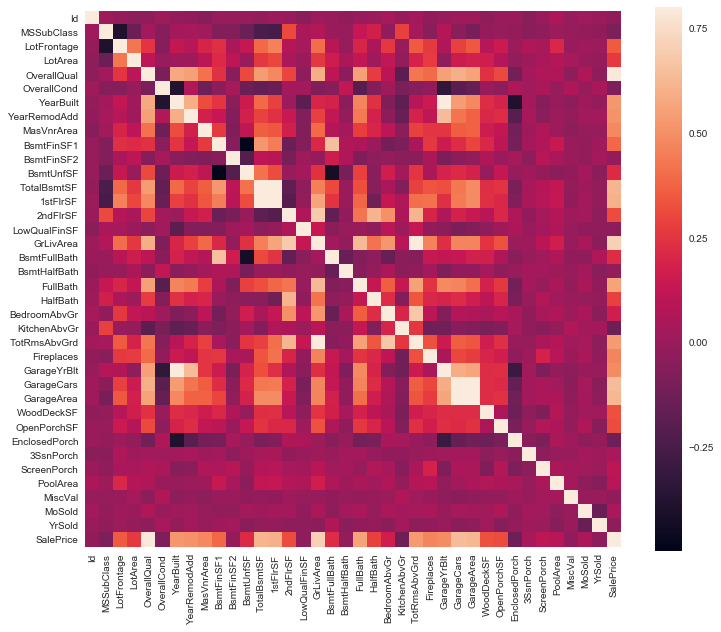

In [152]:
#correlation matrix
corrmat = df_train.corr()
f , ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=.8,square=True);

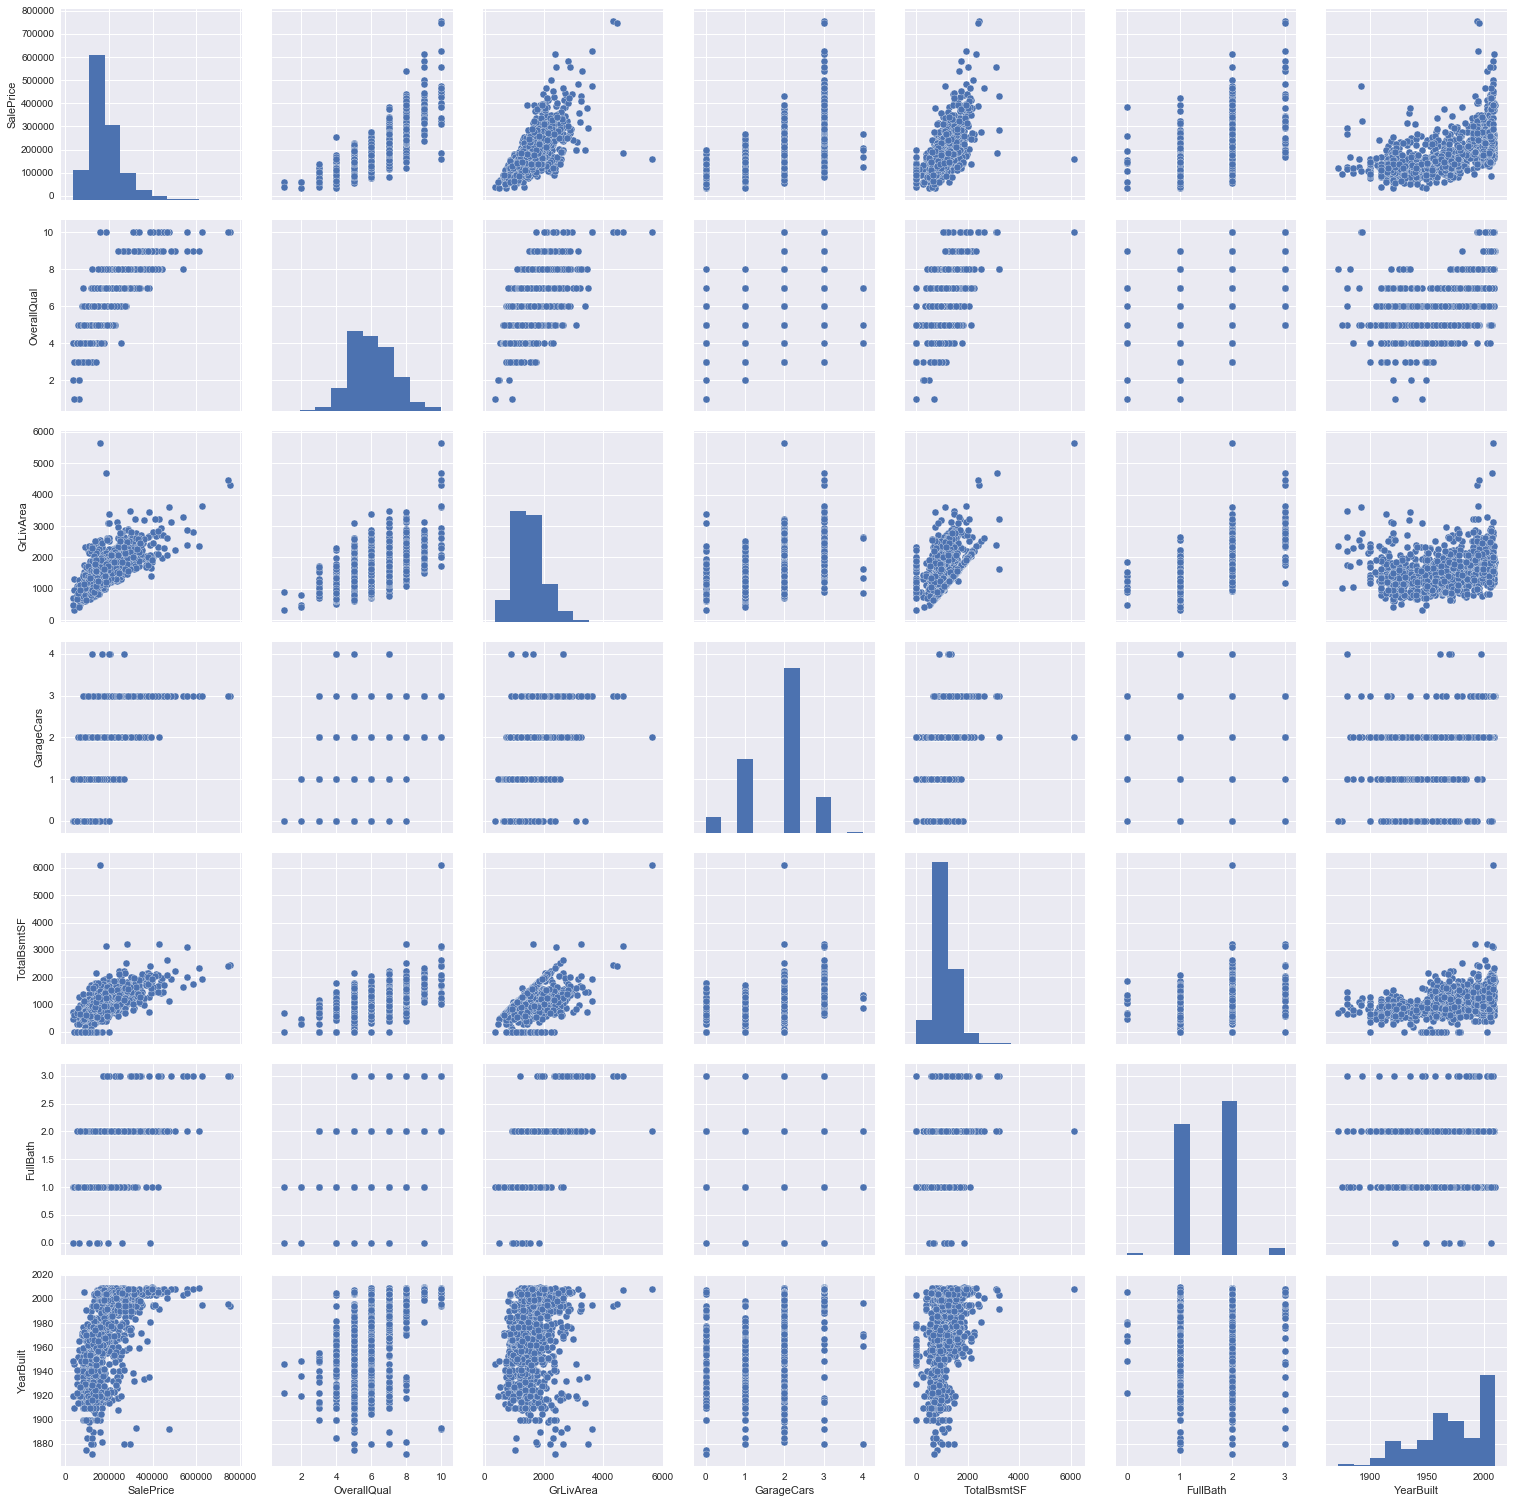

In [153]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 3)
plt.show();


In [154]:
# missing Data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()
           ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


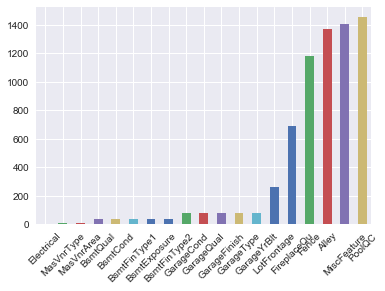

In [155]:
missing_data = df_train.isnull().sum()
missing_data =missing_data[missing_data>0]
missing_data.sort_values(inplace = True)
missing_data.plot.bar(rot=45);

In [156]:
print(missing_data.shape)
for x in df_train.columns: 
    print(x,df_train[str(x)].dtype)

(19,)
Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu 

In [157]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

/Users/daywalker/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


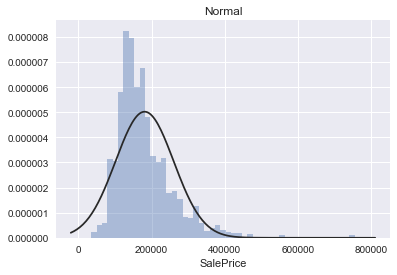

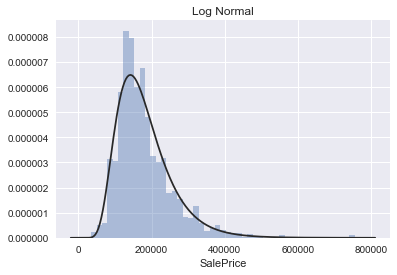

In [158]:
y = df_train['SalePrice']
plt.figure(1);plt.title('Normal')
sns.distplot(y,kde=False,fit=norm);

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=lognorm)

/Users/daywalker/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


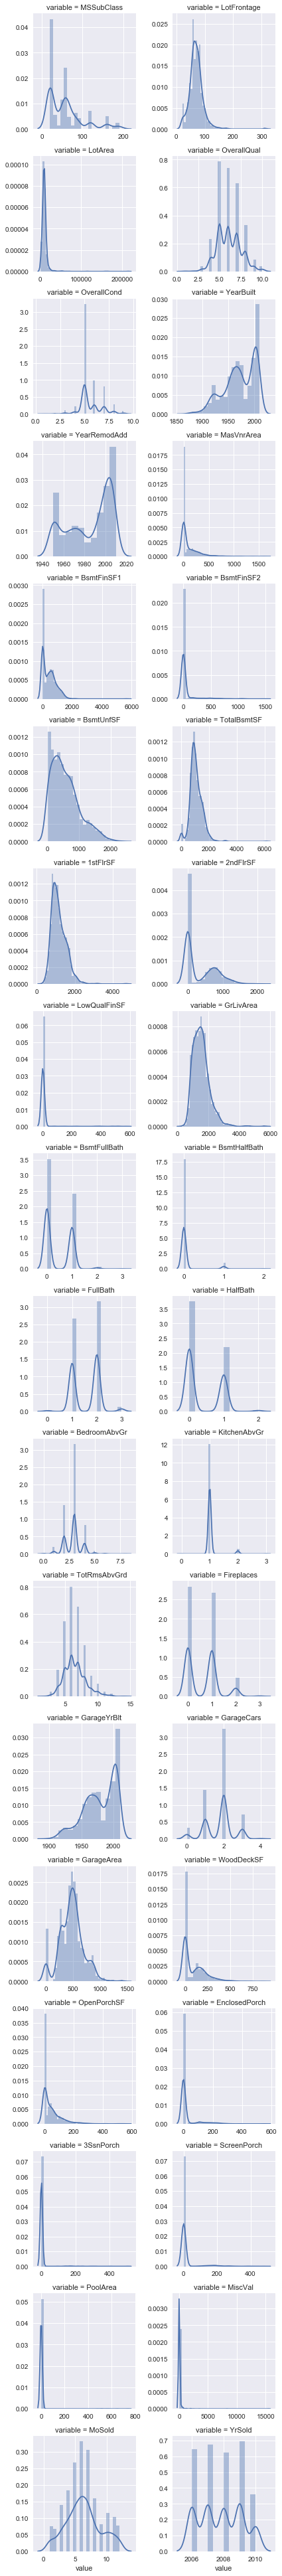

In [159]:
#before changing the data into lognormality
f = pd.melt(df_train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [160]:
for c in qualitative:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train[c] = df_train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

In [161]:
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qualitative)
f.head(10)

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
5,143000,MSZoning,RL
6,307000,MSZoning,RL
7,200000,MSZoning,RL
8,129900,MSZoning,RM
9,118000,MSZoning,RL


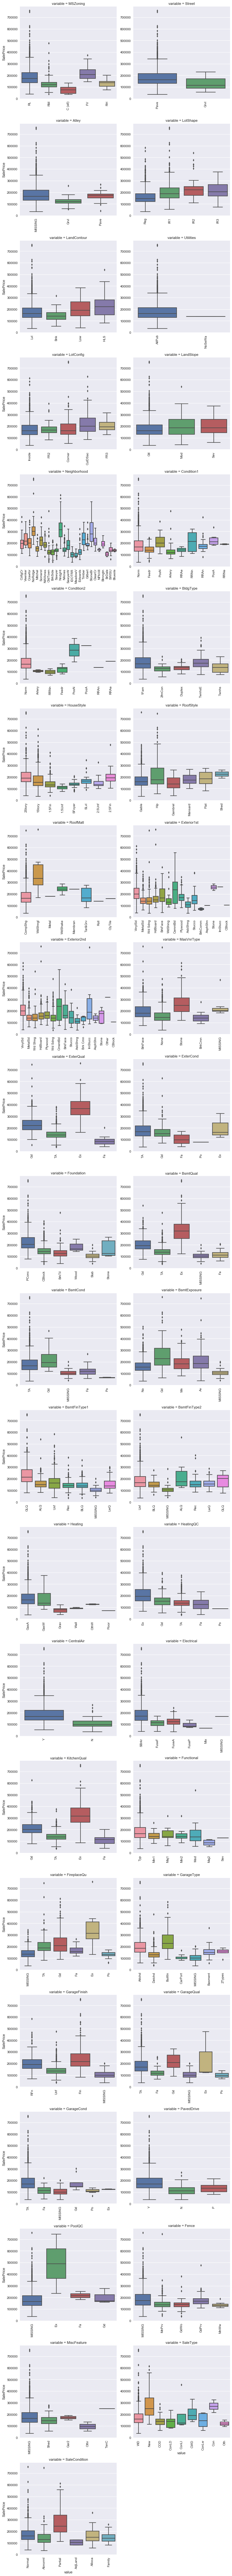

In [162]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")


In [163]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)

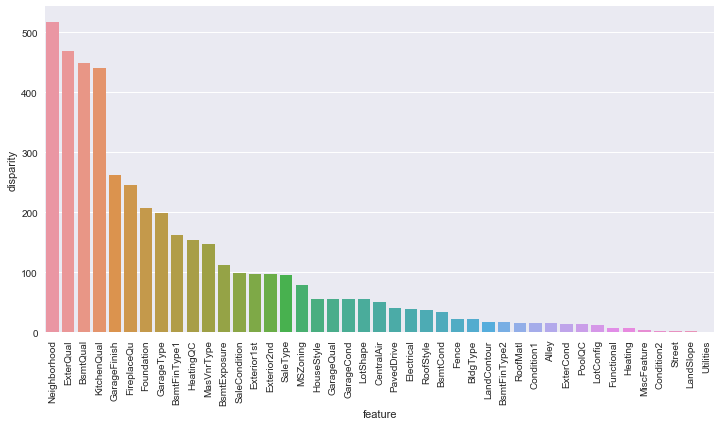

In [164]:
a['disparity'] = np.log(1./a['pval'].values)
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [165]:
def transform_housing_data(df):
    """General data-conditioning function to prepare the housing DataFrame for
    analysis. Mostly NaN filling.
    Based on : https://www.kaggle.com/sdevan/top-25-with-ridge-detailed-eda-and-data-cleaning
    """

    fillnone = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
                'MasVnrType']

    fillzero = ['GarageArea', 'TotalBsmtSF', 'LotFrontage', 'MasVnrArea',
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

    fillmode = ['Electrical', 'KitchenQual', 'SaleType', 'Exterior1st',
                'Exterior2nd', 'Functional', 'MasVnrType', 'MSZoning']

    # has some NaNs. Value is highly correlated with YearBuilt
    df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

    # There seems to be an erroneous value for GarageYrBlt of 2207
    # Based on the YearBuilt being 2006, I assume it should be 2007
    df.loc[df.GarageYrBlt == 2207.0, 'GarageYrBlt'] = 2007.0

    # Convert column to strings. It's categorical data stored as int64
    df['MSSubClass'] = df['MSSubClass'].astype(str)

    # Really only one value present
    df.drop(['Utilities'], axis=1, inplace=True)

    # Apparently this can't be done without looping.
    for colname in fillnone:
        print('col',colname)
        df[colname].fillna('none', inplace=True)

    for colname in fillzero:
        df[colname].fillna(0, inplace=True)

    for colname in fillmode:
        df[colname].fillna(df[colname].mode()[0], inplace=True)
    
    categorical_cols = df.columns[df.dtypes == 'object']
    
    for c in categorical_cols:
        lbl = LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
    
    return df

In [170]:
train = transform_housing_data(pd.read_csv('train.csv'))

col Alley
col BsmtQual
col BsmtCond
col BsmtExposure
col BsmtFinType1
col BsmtFinType2
col FireplaceQu
col GarageType
col GarageFinish
col GarageQual
col GarageCond
col PoolQC
col Fence
col MiscFeature
col MasVnrType


In [171]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,9,3,65.0,8450,1,2,3,3,4,...,0,3,4,4,0,2,2008,8,4,208500
1,2,4,3,80.0,9600,1,2,3,3,2,...,0,3,4,4,0,5,2007,8,4,181500
2,3,9,3,68.0,11250,1,2,0,3,4,...,0,3,4,4,0,9,2008,8,4,223500
3,4,10,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,9,3,84.0,14260,1,2,0,3,2,...,0,3,4,4,0,12,2008,8,4,250000
5,6,8,3,85.0,14115,1,2,0,3,4,...,0,3,2,2,700,10,2009,8,4,143000
6,7,4,3,75.0,10084,1,2,3,3,4,...,0,3,4,4,0,8,2007,8,4,307000
7,8,9,3,0.0,10382,1,2,0,3,0,...,0,3,4,2,350,11,2009,8,4,200000
8,9,8,4,51.0,6120,1,2,3,3,4,...,0,3,4,4,0,4,2008,8,0,129900
9,10,3,3,50.0,7420,1,2,3,3,0,...,0,3,4,4,0,1,2008,8,4,118000


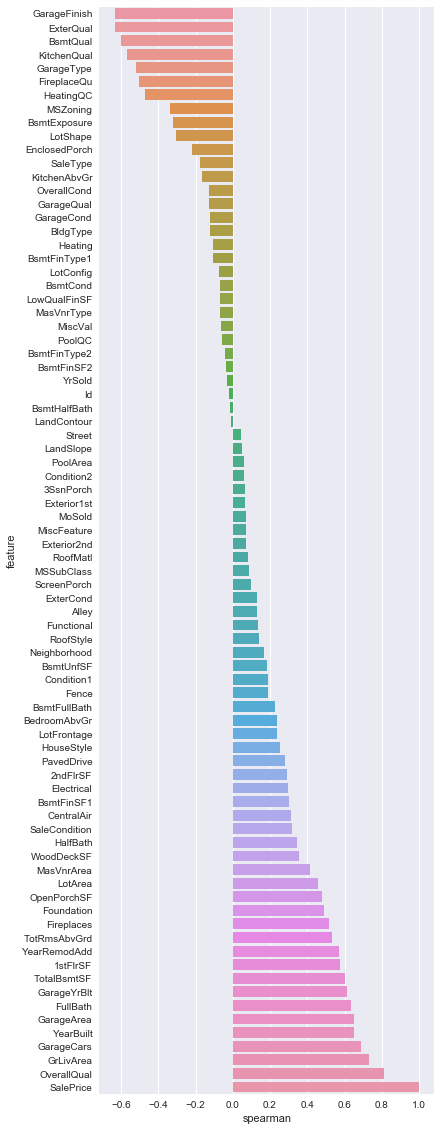

In [175]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    

spearman(train, train.columns)